<a href="https://colab.research.google.com/github/stefanny84/CP2---SERS/blob/main/cp2_SERS_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1CCA:

Letícia Gabrielle Andrade Temoteo RM 563985 \
Stefanny Brum dos Santos RM 566216

Regressão (Appliances Energy Prediction)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/Regressao_energydata_complete.csv', sep=',', low_memory=False)
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df = df.drop(['date', 'lights'], axis=1)
if df.isnull().sum().sum() > 0:
    print("Existem valores ausentes. Preenchendo com a média da coluna.")
    df = df.fillna(df.mean())

In [ ]:
y = df['Appliances']
X = df.drop(['Appliances'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

models = {
    "Regressão Linear": linear_reg,
    "Árvore de Regressão": tree_reg,
    "Random Forest": forest_reg
}

results = {}

In [ ]:
for name, model in models.items():

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  results[name] = {
    "R²": r2,
    "RMSE (Wh)": rmse,
    "MAE (Wh)": mae
  }

In [ ]:
results_df = pd.DataFrame(results).T

print("Resultados da Avaliação dos Modelos:")
print(results_df)

Resultados da Avaliação dos Modelos:
                           R²  RMSE (Wh)   MAE (Wh)
Regressão Linear     0.145863  92.452288  53.439226
Árvore de Regressão  0.185609  90.275596  37.871801
Random Forest        0.590481  64.016330  30.482974


In [ ]:
best_model_name = results_df['R²'].idxmax()
print(f"\nO melhor modelo com base no R² é: {best_model_name}")


O melhor modelo com base no R² é: Random Forest


O melhor modelo com base no R² é o Random Forest, pois está mais próximo de 1. Trazendo uma previsibilidade maior.

Classificação (Smart Grid Stability

In [ ]:
df = pd.read_csv('/content/Classificacao_smart_grid_stability_augmented.csv', sep=',', low_memory=False)
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
df = df.drop('stab', axis=1)

In [ ]:
y = df['stabf']
X = df.drop('stabf', axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

models = {
    "Regressão Logística": log_reg,
    "Árvore de Decisão": tree_clf,
    "Random Forest": forest_clf
}

In [ ]:
for name, model in models.items():
    print(f"{name}")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Regressão Logística
Acurácia: 0.8195
Relatório de Classificação:
              precision    recall  f1-score   support

      stable       0.77      0.71      0.74      4344
    unstable       0.84      0.88      0.86      7656

    accuracy                           0.82     12000
   macro avg       0.81      0.80      0.80     12000
weighted avg       0.82      0.82      0.82     12000

Árvore de Decisão
Acurácia: 0.8953
Relatório de Classificação:
              precision    recall  f1-score   support

      stable       0.86      0.86      0.86      4344
    unstable       0.92      0.92      0.92      7656

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000

Random Forest
Acurácia: 0.9518
Relatório de Classificação:
              precision    recall  f1-score   support

      stable       0.95      0.92      0.93      4344
    unstable       0.96      0.97      0.96      7

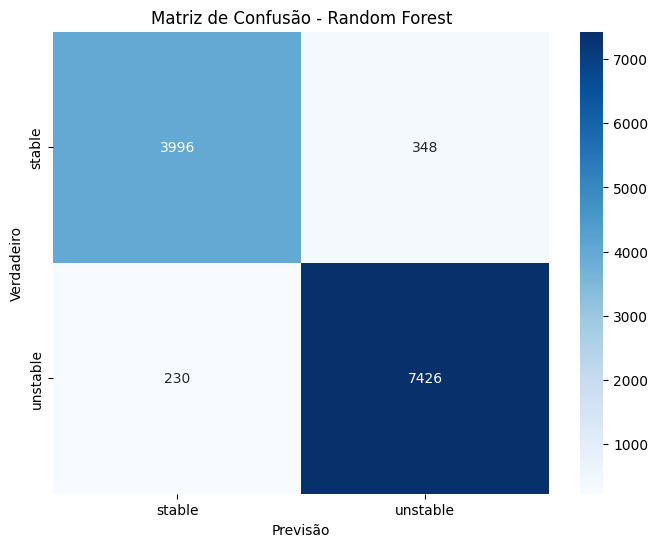

In [ ]:
best_model = forest_clf
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()